In [1]:
from tensorflow.keras.models import load_model
from clean import downsample_mono, envelope
from kapre.time_frequency import STFT, Magnitude, ApplyFilterbank, MagnitudeToDecibel
from sklearn.preprocessing import LabelEncoder
import numpy as np
from glob import glob
import argparse
import os
import pandas as pd
from tqdm import tqdm

In [2]:
from sklearn.metrics import f1_score

In [3]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
model = load_model("models/lstm_tmp.h5")
test_paths = glob('{}/**'.format("npy_augmented_real"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in test_paths if 'Test' in x])
print(test_paths)
test_L = np.abs(np.load(test_paths[0]))
label_L = np.stack(["L" for i in range(test_L.shape[0])])
test_R = np.abs(np.load(test_paths[1]))
label_R = np.stack(["R" for i in range(test_R.shape[0])])
test_data = np.concatenate((test_L,test_R),axis=0)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)
test_label = np.concatenate((label_L,label_R))
print(test_label.shape)
for i in range(test_data.shape[0]):
    test_data[i] /= test_data[i].max()

['npy_augmented_real/Real_L_Test.npy', 'npy_augmented_real/Real_R_Test.npy']
(100, 8, 1921, 1)
(100,)


In [13]:
y_pred = model.predict(test_data)
y_pred_le = np.argmax(y_pred,axis=1)
print(y_pred_le)
print(np.sum(y_pred_le))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
50


In [3]:
model = load_model("models/lstm_ultarmic.h5")
test_paths = glob('{}/**'.format("npy_overlapping"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in test_paths if 'Clarinet' in x])
print(test_paths)
test_data = np.load(test_paths[0])
print(test_data.dtype)
print(test_data.shape)
num_instance = test_data.shape[0]
dim_instance = test_data.shape[1:]
print("Number of Testing instance for each object:",num_instance)
print("Dimension of each instance:",dim_instance)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)

['npy_overlapping/Separated_Clarinet_C.npy']
complex64
(18, 48, 1921)
Number of Testing instance for each object: 18
Dimension of each instance: (48, 1921)
(18, 48, 1921, 1)


In [4]:
model = load_model("models/lstm_ultarmic.h5")
test_paths = glob('{}/**'.format("npy_files"), recursive=True)
test_paths = sorted([x.replace(os.sep, '/') for x in test_paths if 'Test' in x])
print(test_paths)
test_data = np.load(test_paths[0])
print(test_data.dtype)
print(test_data.shape)
num_instance = test_data.shape[0]
dim_instance = test_data.shape[1:]
print("Number of Testing instance for each object:",num_instance)
print("Dimension of each instance:",dim_instance)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)

['npy_files/Test.npy', 'npy_files/Test_label.npy']
float32
(216, 48, 1921)
Number of Testing instance for each object: 216
Dimension of each instance: (48, 1921)
(216, 48, 1921, 1)


In [5]:
src_root = "wavfiles_ultramic"
wav_paths = glob('{}/**'.format(src_root), recursive=True)
wav_paths = [x for x in wav_paths if "Test.wav" in x]
cls = sorted([os.path.split(x)[-1].split('_T')[0] for x in wav_paths])
print("Classes are:",cls)

Classes are: ['Acoustic_guitar', 'Bass_drum', 'Cello', 'Clarinet', 'Double_bass', 'Flute', 'Hi_hat', 'None', 'Saxophone', 'Snare_drum', 'Violin_or_fiddle']


In [6]:
labels = np.load(test_paths[1])
le = LabelEncoder()
le.fit(cls)
y_true = le.fit_transform(labels)
print(y_true)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


In [7]:
y_pred = model.predict(test_data)

In [8]:
y_pred_le = np.argmax(y_pred,axis=1)
print(y_pred_le)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  1  1  1  4  1  4  1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  2  4  4  4  4  4  4  4  1  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9
  9  9  9 10 10 10 10  9 10 10 10 10 10 10  8 10 10 10 10 10 10 10 10 10]


In [9]:
y_pred_labels = [cls[x] for x in y_pred_le]
y_true_labels = [cls[x] for x in y_true]

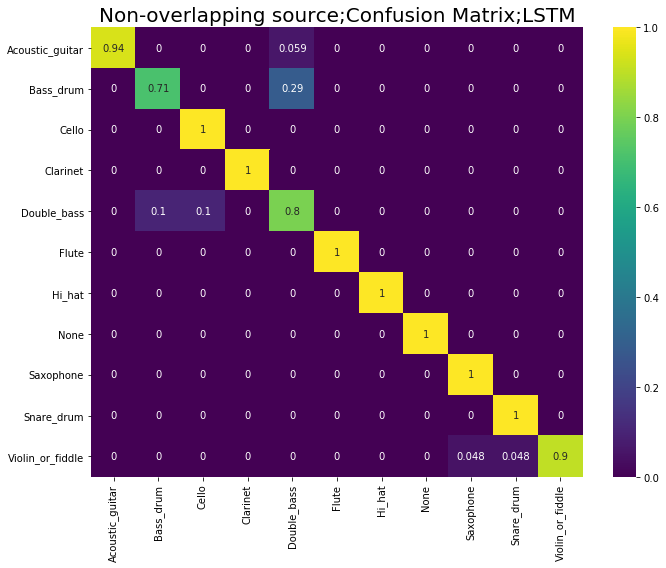

In [10]:
conf_mat = confusion_matrix(y_true_labels, y_pred_labels, labels=cls,normalize='true')
df_cm = pd.DataFrame(conf_mat, index = cls,
                     columns = cls)
plt.figure(figsize = (10,8),tight_layout=True)
plt.title('Non-overlapping source;Confusion Matrix;LSTM',fontsize=20)
hm = sns.heatmap(df_cm, annot=True, cmap='viridis')
fig = hm.get_figure()    
#fig.savefig("nonlap_cm_lstm.jpg",dpi=100)
plt.show()

In [14]:
f1_score(y_true_labels, y_pred_labels, average='weighted')

0.9674820171129808

In [65]:
model = load_model("models/lstm_ultarmic.h5")
npy_paths = glob('{}/**'.format("npy_files_predict"), recursive=True)
npy_paths = sorted([x.replace(os.sep, '/') for x in npy_paths if 'DASICA.npy' in x])
test_data = []
for path in npy_paths:
    test_data.append(np.load(path))
test_data = np.stack(test_data)
print(test_data.shape)
num_object = test_data.shape[0]
num_instance = test_data.shape[1]
dim_instance = test_data.shape[2:]
print("Number of Testing Object:",num_object)
print("Number of Testing instance for each object:",num_instance)
print("Dimension of each instance:",dim_instance)
test_data = test_data.reshape((*test_data.shape,1))
print(test_data.shape)

(2, 100, 36, 234)
Number of Testing Object: 2
Number of Testing instance for each object: 100
Dimension of each instance: (36, 234)
(2, 100, 36, 234, 1)


In [66]:
classes = sorted(os.listdir("npy_files_predict"))
le = LabelEncoder()
le.fit(classes)
print(classes)
labels = []
for i in range(num_object):
    for j in range(num_instance):
        labels.append(classes[i])
y_true = le.fit_transform(labels)
print(y_true)

['Drill', 'Drill_Test1.npy', 'Shaver']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [71]:
y_pred = model.predict(test_data[1,:,:,:,:])

In [72]:
y_mean = np.mean(y_pred, axis=0)
print(y_mean)

[0.99421227 0.00578771]


In [69]:
train_data = np.load("stft_object_clipping.npy")
train_data = train_data.reshape((*train_data.shape,1))
print(train_data.shape)

(2, 300, 36, 234, 1)


In [70]:
y_pred = model.predict(train_data[1,:,:,:,:])
y_mean = np.mean(y_pred, axis=0)
print(y_mean)

[0.00108265 0.9989175 ]
